# Stroke Prediction Using DT & KNN
#### Daniyal Mehareen

In [42]:
import pandas as pd
import numpy as np
import os

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler

### Part a)

In [2]:
data = pd.read_csv("./stroke.csv")

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.shape

(44944, 11)

In [4]:
# Determining unique value counts for each feature
unique_counts = data.nunique()

# Identifing categorical and numerical features using their counts
categorical_columns = []
numerical_columns = []

for feature in unique_counts.index:
    if unique_counts[feature] <= 10:
        categorical_columns.append(feature)
    else:
        numerical_columns.append(feature)


string_columns = data.select_dtypes(include=['object']).columns

# Printing the identified features
print("Categorical Features:")
print(categorical_columns,"\n")

print("Numerical Features:")
print(numerical_columns,"\n")

print("String Features:")
print(string_columns)

Categorical Features:
['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke'] 

Numerical Features:
['age', 'avg_glucose_level', 'bmi'] 

String Features:
Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [5]:
# Converting String Values into Numerical
string_columns = data.select_dtypes(include=['object']).columns

# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Converting categorical columns to numerical values
for column in string_columns:
    data[column] = label_encoder.fit_transform(data[column])

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


<Axes: >

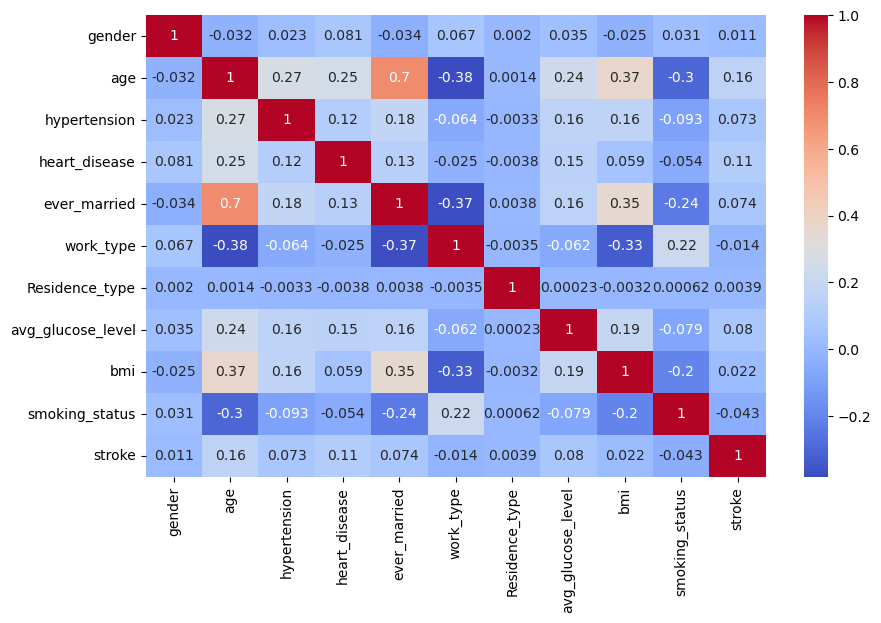

In [6]:
corr_mat = data.corr()

plt.figure(figsize=(10,6))

sns.heatmap(data=corr_mat,annot=True, cmap='coolwarm')

### Part b)
Pre proccessing the data

In [7]:
data.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  1523
smoking_status          0
stroke                  0
dtype: int64

In [8]:
features = data.iloc[:,:-1]
targets = data["stroke"]

features.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2


In [9]:
# Handling the missing values
for column in features.columns:

    if column in numerical_columns:
        features[column].fillna(features[column].mean(), inplace=True)
    
# Dropping other N/A values
data = pd.concat([features,targets], axis=1)

data.dropna(inplace=True)

In [10]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
features = data.iloc[:,:-1]
targets = data.iloc[:,-1]

scaler = MinMaxScaler()
features_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
features_normalized.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.5,0.816895,0.0,1.0,1.0,0.50,1.0,0.735819,0.302857,0.25
1,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.623639,0.210339,0.50
2,0.5,0.975586,0.0,1.0,1.0,0.50,0.0,0.215717,0.256000,0.50
3,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.492396,0.277714,0.75
4,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.504639,0.158857,0.50


In [12]:
data = pd.concat([features_normalized,targets], axis=1)

### Part c)

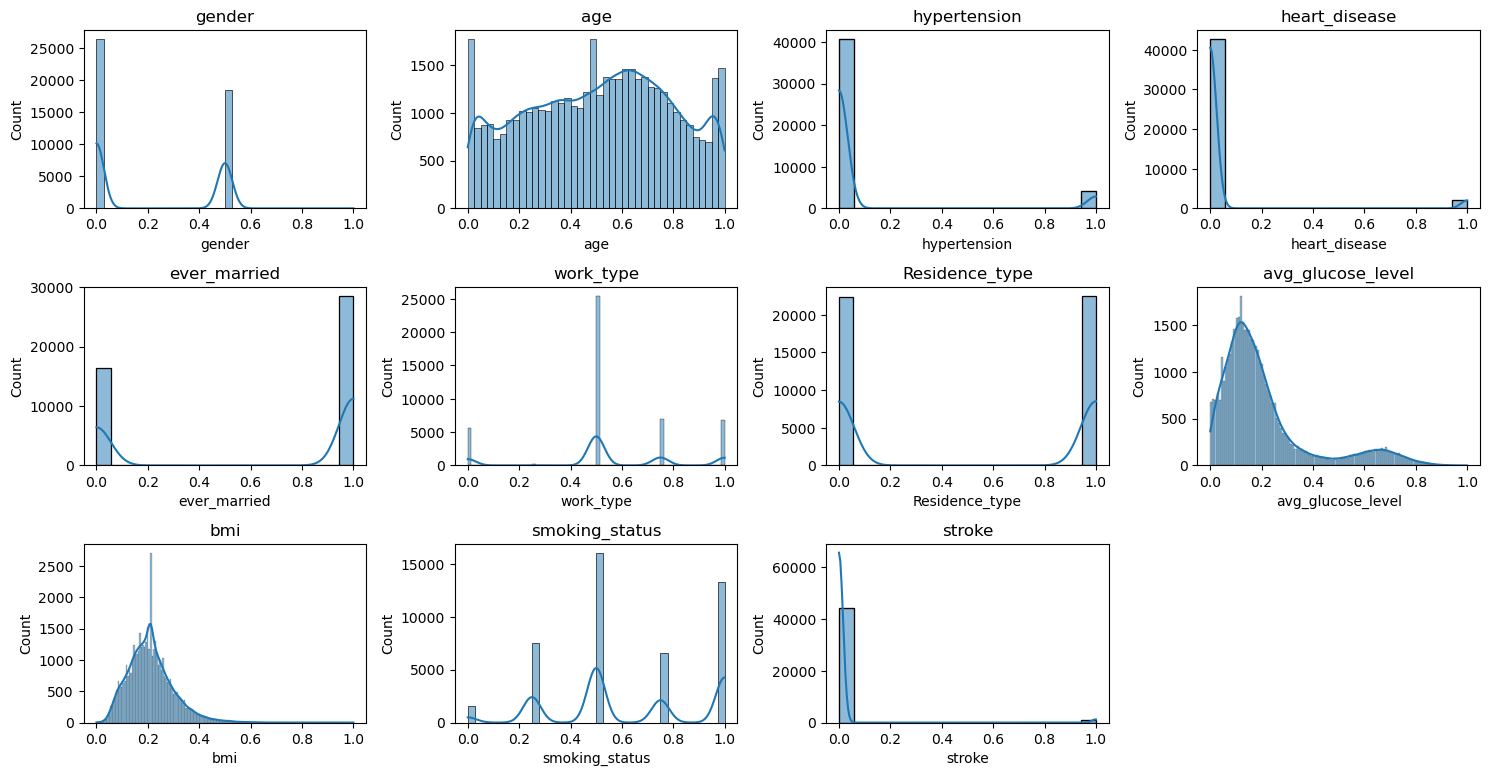

In [15]:
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(15, 10))
axs = axs.flatten()

for i, column in enumerate(data.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(data=data, x=column, kde=True)
    axs[i].set_title(column)

# Removing empty subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [16]:
data.groupby(["stroke"]).count()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,,,,
0,44114,44114,44114,44114,44114,44114,44114,44114,44114,44114
1,830,830,830,830,830,830,830,830,830,830


In [17]:
biased_columns = ["hyper_tension","heart_disease","work_type","stroke"]

### Part d)

In [18]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [19]:
# Define the target variable column
target_variable = "stroke"

# Perform stratified sampling to split the dataset
train_val_data, test_data = train_test_split(data, test_size=0.2, stratify=data[target_variable], random_state=42)
train_data, val_data = train_test_split(train_val_data, test_size=0.25, stratify=train_val_data[target_variable], random_state=42)

# Print the sizes of the resulting datasets
print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")

Training set size: 26966
Validation set size: 8989
Test set size: 8989


In [20]:
# Initialzing the train / validation / test data
X_train, y_train = train_data.iloc[:,:-1], train_data.iloc[:,-1]
X_val, y_val = val_data.iloc[:,:-1], val_data.iloc[:,-1]
X_test, y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1]

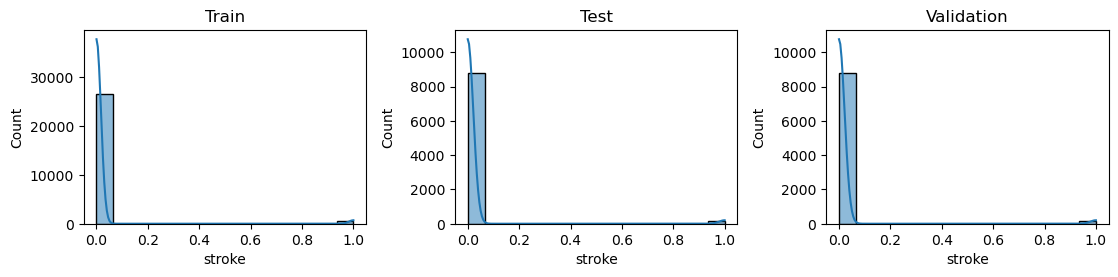

In [22]:
# Plotting the distribution of each group
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(15, 10))
axs = axs.flatten()
group = {
    "Train": train_data,
    "Test": test_data,
    "Validation": val_data
    }

for i, item in enumerate(group.keys()):
    plt.subplot(4, 4, i+1)
    sns.histplot(group[item][target_variable], kde=True)
    axs[i].set_title(item)

# Removing empty subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

### Part e)

Testing K = 1
Testing K = 2
Testing K = 3
Testing K = 4
Testing K = 5
Testing K = 6
Testing K = 7
Testing K = 8
Testing K = 9
Testing K = 10
Testing K = 11
Testing K = 12
Testing K = 13
Testing K = 14
Testing K = 15
Testing K = 16
Testing K = 17
Testing K = 18
Testing K = 19
Testing K = 20
Testing K = 21
Testing K = 22
Testing K = 23
Testing K = 24
Testing K = 25
Testing K = 26
Testing K = 27
Testing K = 28
Testing K = 29
Testing K = 30
Testing K = 31
Testing K = 32
Testing K = 33
Testing K = 34
Testing K = 35
Testing K = 36
Testing K = 37
Testing K = 38
Testing K = 39


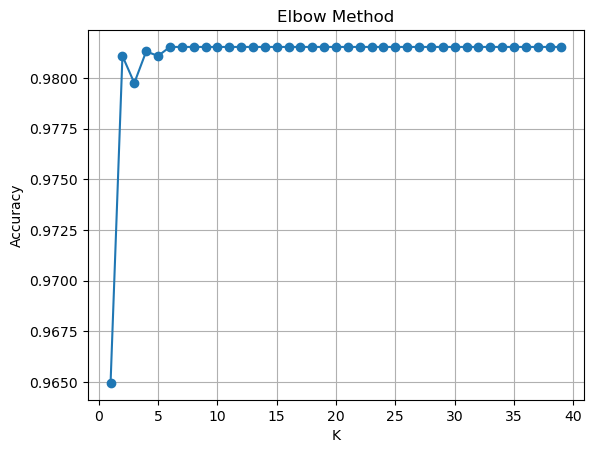

In [23]:
# Defining the range of possible K values to test
k_values = range(1, 40)

# Initialize lists to store the accuracy scores
accuracy_scores = []

# Defining best K and accuracy value
best_accuracy = 0
best_K = 0

# Iterating over each K value
for k in k_values:
    # Creating and training the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Evaluating the model on the validation set
    accuracy = knn.score(X_val, y_val)
    accuracy_scores.append(accuracy)

    # Updating the best values
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_K = k
    
    print(f"Testing K = {k}")

# Plot the elbow curve
plt.plot(k_values, accuracy_scores, marker='o')
plt.grid()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Elbow Method')
plt.show()

In [24]:
print(f"Best Accuracy: {best_accuracy*100}% for K = {best_K}")

Best Accuracy: 98.15329847591501% for K = 6


According to the chart above, the elbow point of the chart is less than the optimal K (K=8) </br> So by looking at the chart we can conclude that the elbow of the chart is located at K=6

In [25]:
best_k = 6

### Part f)

In [26]:
# Creating a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Training the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Part g)

In [27]:
# Defining the hyperparameter grid for GridSearchCV
param_grid = {
    'max_depth': np.array(list(range(5,30,5))),
    'min_samples_split': np.array(list(range(2,10))),
    'min_samples_leaf': np.array(list(range(2,20,3)))
}

# Creating a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Performing grid search to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}


In [28]:
best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(X_train, y_train)

y_pred_val_decision_tree = best_clf.predict(X_val)

### Part h)

In [29]:
# Evaluating the performance of Decision Tree
accuracy = accuracy_score(y_val, y_pred_val_decision_tree)
precision = precision_score(y_val, y_pred_val_decision_tree)
recall = recall_score(y_val, y_pred_val_decision_tree)
f1 = f1_score(y_val, y_pred_val_decision_tree)

print("Desicion Tree: (Tuned Hyper-parameters)")
print(f"\tAccuracy: {accuracy*100}%")
print(f"\tPrecision: {precision*100}%")
print(f"\tRecall: {recall*100}%")
print(f"\tF1: {f1*100}%")

Desicion Tree: (Tuned Hyper-parameters)
	Accuracy: 98.06430081210368%
	Precision: 0.0%
	Recall: 0.0%
	F1: 0.0%


In [30]:
# Creating and training the KNN model with K = 6
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred_val_knn = knn.predict(X_val)

In [31]:
# Evaluating the performance of KNN with K = 6
accuracy = accuracy_score(y_val, y_pred_val_knn)
precision = precision_score(y_val, y_pred_val_knn)
recall = recall_score(y_val, y_pred_val_knn)
f1 = f1_score(y_val, y_pred_val_knn)

print("KNN: (With K = 6)")
print(f"\tAccuracy: {accuracy*100}%")
print(f"\tPrecision: {precision*100}%")
print(f"\tRecall: {recall*100}%")
print(f"\tF1: {f1*100}%")

KNN: (With K = 6)
	Accuracy: 98.15329847591501%
	Precision: 0.0%
	Recall: 0.0%
	F1: 0.0%


C:\Users\mehra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Part j)

In [37]:
y_pred_test = best_clf.predict(X_test)

# Evaluating the performance of Decision Tree
accuracy = accuracy_score(y_test, y_pred_test)

precision_micro = precision_score(y_test, y_pred_test, average="micro")
recall_micro = recall_score(y_test, y_pred_test, average="micro")
f1_micro = f1_score(y_test, y_pred_test, average="micro")

precision_macro = precision_score(y_test, y_pred_test, average="macro")
recall_macro = recall_score(y_test, y_pred_test, average="macro")
f1_macro = f1_score(y_test, y_pred_test, average="micro")

print("Desicion Tree: (Tuned Hyper-parameters)")
print(f"\tAccuracy: {accuracy*100}%")
print(f"\tPrecision (Micro / Macro): {precision_micro*100}% / {precision_macro*100}%")
print(f"\tRecall (Micro / Macro): {recall_micro*100}%  / {recall_macro*100}%")
print(f"\tF1 (Micro / Macro): {f1_micro*100}%  / {f1_macro*100}%")

Desicion Tree: (Tuned Hyper-parameters)
	Accuracy: 98.09767493603293%
	Precision (Micro / Macro): 98.09767493603293% / 49.07613535173642%
	Recall (Micro / Macro): 98.09767493603293%  / 49.97166496656466%
	F1 (Micro / Macro): 98.09767493603294%  / 98.09767493603294%


In [39]:
# Creating and training the KNN model with K = 6
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred_test = knn.predict(X_test)

In [40]:
# Evaluating the performance of KNN with K = 6
accuracy = accuracy_score(y_test, y_pred_test)

precision_micro = precision_score(y_test, y_pred_test, average="micro")
recall_micro = recall_score(y_test, y_pred_test, average="micro")
f1_micro = f1_score(y_test, y_pred_test, average="micro")

precision_macro = precision_score(y_test, y_pred_test, average="macro")
recall_macro = recall_score(y_test, y_pred_test, average="macro")
f1_macro = f1_score(y_test, y_pred_test, average="micro")

print("KNN: (With K = 6)")
print(f"\tAccuracy: {accuracy*100}%")
print(f"\tPrecision (Micro / Macro): {precision_micro*100}% / {precision_macro*100}%")
print(f"\tRecall (Micro / Macro): {recall_micro*100}%  / {recall_macro*100}%")
print(f"\tF1 (Micro / Macro): {f1_micro*100}%  / {f1_macro*100}%")

KNN: (With K = 6)
	Accuracy: 98.15329847591501%
	Precision (Micro / Macro): 98.15329847591501% / 49.076649237957504%
	Recall (Micro / Macro): 98.15329847591501%  / 50.0%
	F1 (Micro / Macro): 98.15329847591501%  / 98.15329847591501%


C:\Users\mehra\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Part k)

Oversampling data using SMOTE

In [54]:
# Creating an instance of RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Applying RandomUnderSampler undersampling on the training data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

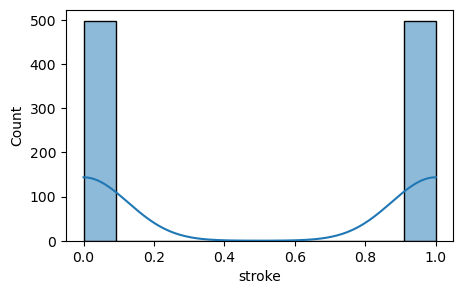

In [56]:
plt.figure(figsize=(5,3))

sns.histplot(data=y_train_resampled,  kde=True)
plt.show()

In [57]:
best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(X_train_resampled, y_train_resampled)

y_pred_test = best_clf.predict(X_test)

# Evaluating the performance of Decision Tree
accuracy = accuracy_score(y_test, y_pred_test)

precision_micro = precision_score(y_test, y_pred_test, average="micro")
recall_micro = recall_score(y_test, y_pred_test, average="micro")
f1_micro = f1_score(y_test, y_pred_test, average="micro")

precision_macro = precision_score(y_test, y_pred_test, average="macro")
recall_macro = recall_score(y_test, y_pred_test, average="macro")
f1_macro = f1_score(y_test, y_pred_test, average="micro")

print("Desicion Tree: (Tuned Hyper-parameters)")
print(f"\tAccuracy: {accuracy*100}%")
print(f"\tPrecision (Micro / Macro): {precision_micro*100}% / {precision_macro*100}%")
print(f"\tRecall (Micro / Macro): {recall_micro*100}%  / {recall_macro*100}%")
print(f"\tF1 (Micro / Macro): {f1_micro*100}%  / {f1_macro*100}%")

Desicion Tree: (Tuned Hyper-parameters)
	Accuracy: 68.4503281788853%
	Precision (Micro / Macro): 68.4503281788853% / 51.94504807782185%
	Recall (Micro / Macro): 68.4503281788853%  / 73.58454559482405%
	F1 (Micro / Macro): 68.4503281788853%  / 68.4503281788853%


In [59]:
# Creating and training the KNN model with K = 6
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_resampled, y_train_resampled)

y_pred_test = knn.predict(X_test)

# Evaluating the performance of KNN with K = 6
accuracy = accuracy_score(y_test, y_pred_test)

precision_micro = precision_score(y_test, y_pred_test, average="micro")
recall_micro = recall_score(y_test, y_pred_test, average="micro")
f1_micro = f1_score(y_test, y_pred_test, average="micro")

precision_macro = precision_score(y_test, y_pred_test, average="macro")
recall_macro = recall_score(y_test, y_pred_test, average="macro")
f1_macro = f1_score(y_test, y_pred_test, average="micro")

print("KNN: (With K = 6)")
print(f"\tAccuracy: {accuracy*100}%")
print(f"\tPrecision (Micro / Macro): {precision_micro*100}% / {precision_macro*100}%")
print(f"\tRecall (Micro / Macro): {recall_micro*100}%  / {recall_macro*100}%")
print(f"\tF1 (Micro / Macro): {f1_micro*100}%  / {f1_macro*100}%")

KNN: (With K = 6)
	Accuracy: 78.32906886194237%
	Precision (Micro / Macro): 78.32906886194237% / 52.19964106820307%
	Recall (Micro / Macro): 78.32906886194237%  / 70.93286440559928%
	F1 (Micro / Macro): 78.32906886194237%  / 78.32906886194237%
